In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
from astropy.table import Table, vstack, Column
from astropy.io import ascii
import scipy, pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits as pyfits

In [6]:
legacyid = Table.read("/Users/jgreco/Downloads/legacy-brick-id.csv")

lsbg_tab = Table()

if False:
    for i in range(len(legacyid['brick'])):
        brick = legacyid['brick'][i]      # get brick number and objid from the csv file for Johnny's objects
        objid = legacyid['objid'][i]      # get objid from the csv file for Johnny's objects
        trctr = brick[0:3]                # cut out first three digits to get the tractor file number
        fname = '/scratch/jgreco/tractor/%s/tractor-%s.fits' %(trctr, brick)   
        tab = Table.read(fname)           # create a table for each filename    
        lsbg_tab = vstack([lsbg_tab, tab[objid]])   # stack every desired row into the lsbg table for reference

In [7]:
big_table = Table.read('/Users/jgreco/Downloads/tractor191color.csv')

In [9]:
# Make cuts to clean up the big table data 
keep = (big_table['flux_r']>0.0) & (big_table['flux_r']<1e3)

keep = (big_table['type']!="PSF ")

cname = big_table.colnames[3:]  # want everything except ra, dec data
for i in range(len(cname)):
    keep &= (big_table[cname[i]]>0.0) & (big_table[cname[i]]<1e3)
    keep &= ~np.isnan(big_table[cname[i]])
    keep &= ~np.isinf(big_table[cname[i]])

t = big_table[keep]

In [11]:
len(t)

144779

In [39]:
magg = (22.5-2.5*np.log10(t["flux_g"]))
magr = (22.5-2.5*np.log10(t["flux_r"]))
magz = (22.5-2.5*np.log10(t["flux_z"]))
ap_g = (22.5-2.5*np.log10(t["apflux_2.0_g"]))
ap_r = (22.5-2.5*np.log10(t["apflux_2.0_r"]))
ap_z = (22.5-2.5*np.log10(t["apflux_2.0_z"]))

# make magnitude cuts to clean up data
mask = (magg < 22.5)
mask &= (ap_g < 22.5)
mask &= (magr<23.) & (magz<23.)
mask &= (ap_r<23.) & (ap_z<23.)
mask &= t['shapeexp_r']>2.5
t2 = t[mask].copy()

In [54]:
len(t2)

1453

In [56]:
output = t2.copy()

In [57]:
output.rename_column('ra', 'RA')
output.rename_column('dec', 'Dec')

In [59]:
output['RA', 'Dec'].write('/Users/jgreco/Desktop/test.fits')

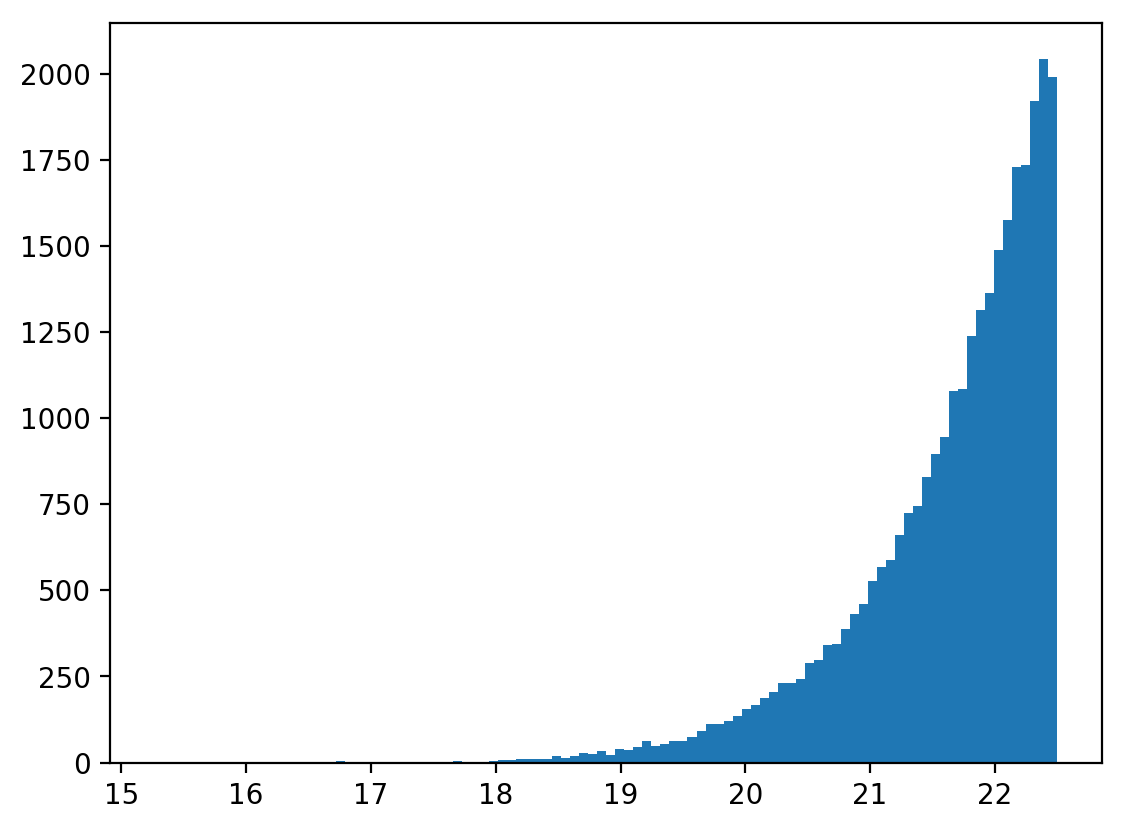

In [27]:
plt.hist(ap_g[mask], bins=100);

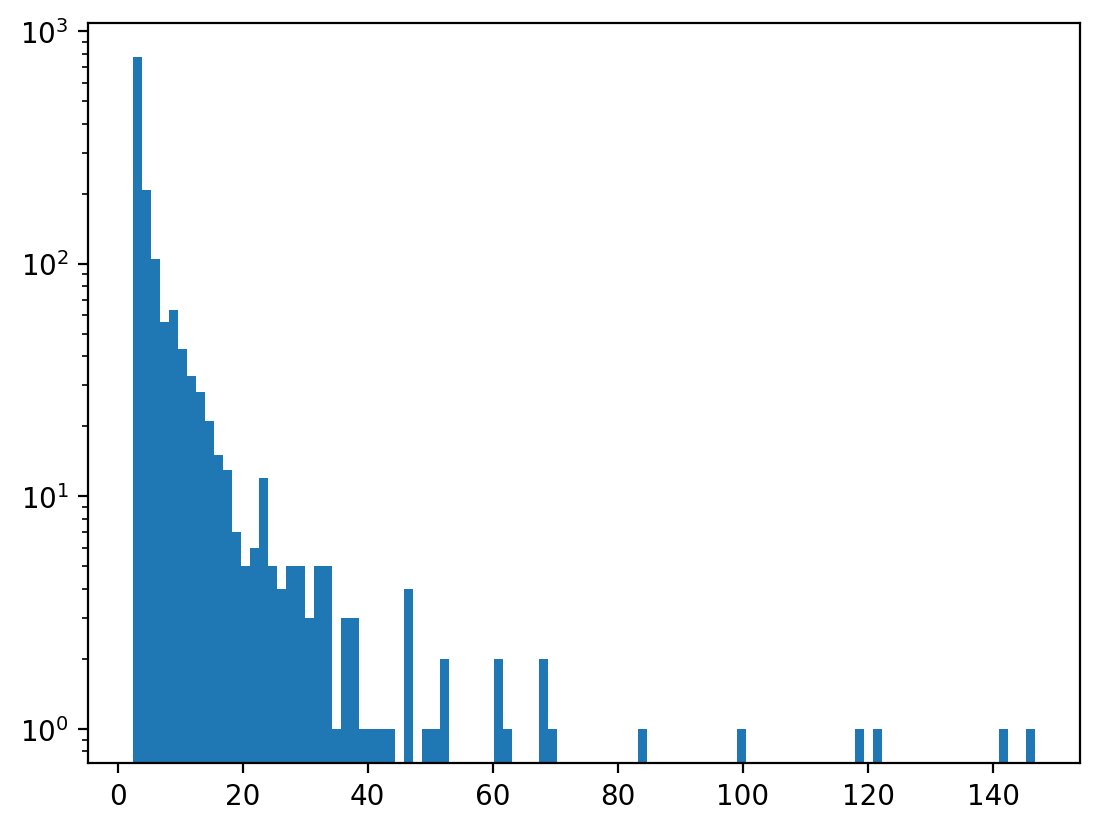

In [46]:
plt.hist(t2['shapeexp_r'], bins=100, log=True);
#plt.xscale('log');

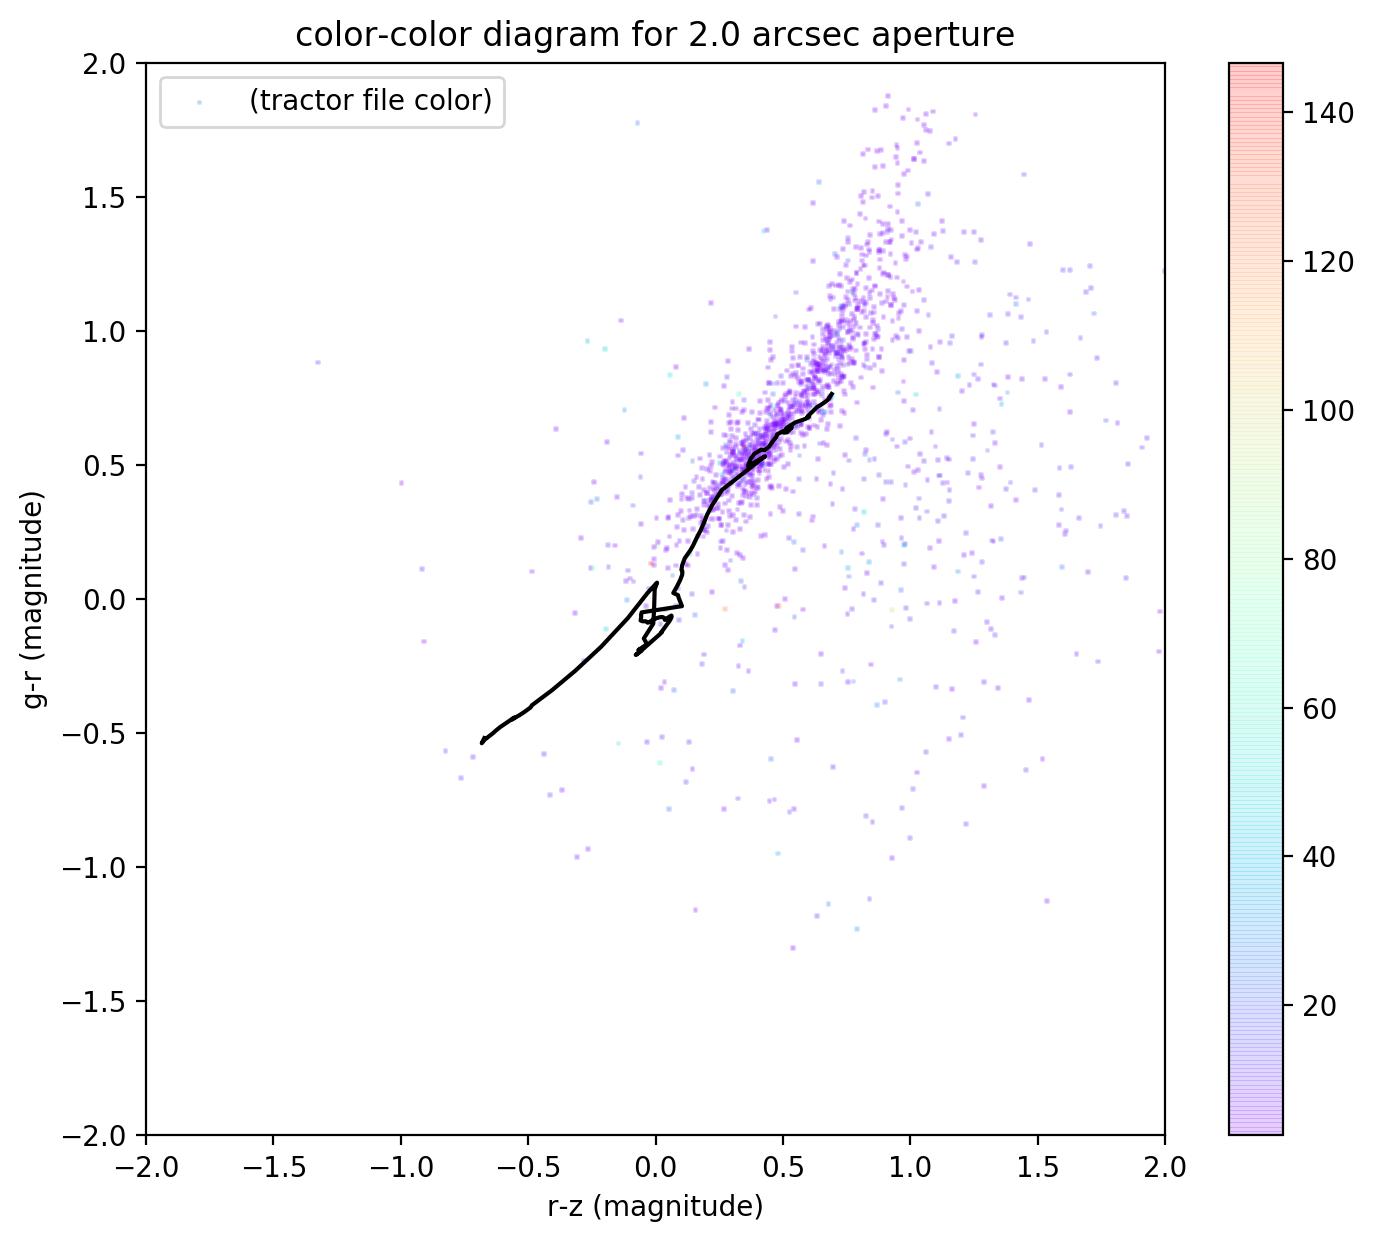

In [53]:
#------make the color-color (g-r), (r-z) band plot for aperture (data) fluxes----#
plt.style.use('default')
fig = plt.figure(221, figsize=(7.3, 6.3))
ax1 = plt.subplot(111)

# get lsbg aperture fluxes for 2.0 arcsec aperture
#lsbg_apflux_r = 22.5 - 2.5*np.log10(lsbg_tab['apflux_r'][:,4])
#lsbg_apflux_g = 22.5 - 2.5*np.log10(lsbg_tab['apflux_g'][:,4])
#lsbg_apflux_z = 22.5 - 2.5*np.log10(lsbg_tab['apflux_z'][:,4])

# for tractor file
#mag_r = 22.5 - 2.5*np.log10(t2['apflux_2.0_r'])
#mag_g = 22.5 - 2.5*np.log10(t2['apflux_2.0_g'])
#mag_z = 22.5 - 2.5*np.log10(t2['apflux_2.0_z'])

# Do the subtraction for ratio of logs

#lsgb_gr = lsbg_apflux_g - lsbg_apflux_r
#lsgb_rz = lsbg_apflux_r - lsbg_apflux_z

#mag_gr = mag_g - mag_r
#mag_rz = mag_r - mag_z

ap_gr = ap_g[mask] - ap_r[mask]
ap_rz = ap_r[mask] - ap_z[mask]

# make scatterplots 
sctrac = ax1.scatter(ap_rz, ap_gr, s=1, marker = "s", c=t2['shapeexp_r'], cmap='rainbow',
                     alpha=0.2, label = '(tractor file color)')
plt.colorbar(sctrac)
#sc = ax1.scatter(lsgb_rz, lsgb_gr, s=30, marker='D', alpha=1, edgecolors='r', label='lsbg color')

# add johnny's function
fn = '/Users/jgreco/Dropbox/drop-data/hsc-lsbgs/cat-paper-data/bc03/bc2003_lr_BaSeL_m52_chab_ssp.1ABmag'
age, u, g, r, i, z = np.loadtxt(fn, unpack=True, usecols=(0,1,2,3,4,5))
plt.plot(r-z, g-r, color='k') 


plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.title('color-color diagram for 2.0 arcsec aperture')
plt.xlabel('r-z (magnitude)')
plt.ylabel('g-r (magnitude)')

plt.legend(loc='best')
plt.tight_layout()

plt.show()

/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/u/tmakinen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


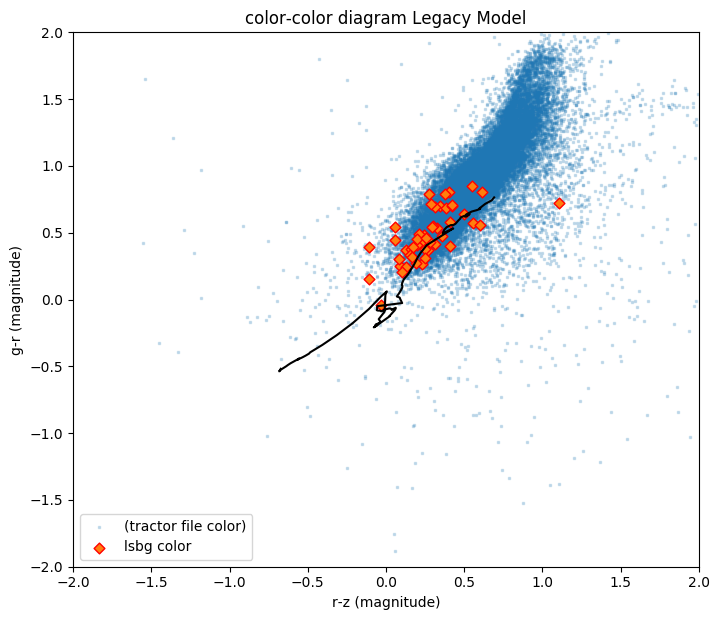

In [10]:
#------make the color-color (g-r), (r-z) band plot for the model fluxes----#
plt.style.use('default')
fig = plt.figure(221, figsize=(7.3, 6.3))
ax1 = plt.subplot(111)


# convert out of nanomaggies for lsbg table (lol) #
lsbg_mag_r = 22.5 - 2.5*np.log10(lsbg_tab['flux_r'])
lsbg_mag_g = 22.5 - 2.5*np.log10(lsbg_tab['flux_g'])
lsbg_mag_z = 22.5 - 2.5*np.log10(lsbg_tab['flux_z'])

# for tractor file
mag_r = 22.5 - 2.5*np.log10(t2['flux_r'])
mag_g = 22.5 - 2.5*np.log10(t2['flux_g'])
mag_z = 22.5 - 2.5*np.log10(t2['flux_z'])

# Do the subtraction for ratio of logs

lsgb_gr = lsbg_mag_g - lsbg_mag_r
lsgb_rz = lsbg_mag_r - lsbg_mag_z

mag_gr = mag_g - mag_r
mag_rz = mag_r - mag_z


# make scatterplots 
sctrac = ax1.scatter(mag_rz, mag_gr, s=1, marker = "s", alpha=0.2, label = '(tractor file color)')
sc = ax1.scatter(lsgb_rz, lsgb_gr, s=30, marker='D', alpha=1, edgecolors='r', label='lsbg color')

# add johnny's function
fn = 'bc2003_lr_BaSeL_m52_chab_ssp.1ABmag'
age, u, g, r, i, z = np.loadtxt(fn, unpack=True, usecols=(0,1,2,3,4,5))
plt.plot(r-z, g-r, color='k') 



plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.title('color-color diagram Legacy Model')
plt.xlabel('r-z (magnitude)')
plt.ylabel('g-r (magnitude)')

plt.legend(loc='best')
plt.tight_layout()

plt.show()